<a href="https://colab.research.google.com/github/vitao-bolado/Trabalho2_AnaliseDados/blob/main/Trabalho2_AnaliseDados_VitorFaustinoTirabassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho 2 - Análise de Desempenho Estudantil**
Desenvolvido por Vitor Faustino Tirabassi

O objetivo é elaborar uma análise dos fatores que influenciam o desempenho acadêmico dos estudantes

Desafios:

* Avaliar a influência de sono, motivação e atividades extracurriculares.

* Verificar o impacto do nível socioeconômico.

* Identficar padrões de sucesso escolar.






##**Etapa 1 - Importação das bibliotecas necessárias**

Nesta etapa, serão importadas as bibliotecas
necessárias. Estas bibliotecas fornecem ferramentas para manipulação de dados (pandas, numpy),
visualização (matplotlib, seaborn) e criação e avaliação de modelos preditivos (sklearn).

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier

# Avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Configurações gerais
import warnings
warnings.filterwarnings('ignore')

# Conexão com Google Drive
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Etapa 2 - Carregamento e visualização inicial dos dados**

Nesta etapa, é carregada a base de dados fornecida e observada sua estrutura, permitindo entender quais variáveis estão presentes, seus tipos e se existem problemas
iniciais como dados ausentes ou colunas desnecessárias.

In [ ]:
# Leitura do arquivo CSV
df = pd.read_csv("/content/drive/MyDrive/03_desempenho_estudantil.csv")

# Exibir as primeiras 5 linhas
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## **Etapa 3 - Análise da estrutura dos dados e tratamento inicial**



###**Etapa 3.1 - Verificação da estrutura da base**

Aqui será analisada a dimensão da base de dados (número de registros e variáveis), identificar os tipos de dados presentes
(variáveis categóricas ou numéricas), e verificar se a base está pronta para análise ou necessita de ajustes.

In [ ]:
# Quantidade de registros e variáveis
print(f'A base possui {df.shape[0]} registros e {df.shape[1]} variáveis.')

# Tipos de variáveis
print("\nTipos de dados por coluna:\n")
print(df.dtypes)

A base possui 6607 registros e 20 variáveis.

Tipos de dados por coluna:

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


###**Etapa 3.2 - Análise de valores ausentes**

Antes da modelagem, é preciso verificar a existência de valores nulos
nas colunas, porque isso pode comprometer a qualidade das previsões e causar erros nos algoritmos.

In [ ]:
# Verificando valores nulos por coluna
print("\nValores nulos por coluna:\n")
df.isnull().sum().rename('Quantidade').sort_values(ascending=False)


Valores nulos por coluna:



,Quantidade
Parental_Education_Level,90
Teacher_Quality,78
Distance_from_Home,67
Hours_Studied,0
Access_to_Resources,0
Parental_Involvement,0
Attendance,0
Extracurricular_Activities,0
Motivation_Level,0
Internet_Access,0


###**Etapa 3.3 - Remoção de dados nulos**

Com a confirmação da existência de dados nulos, nesta etapa eles serão removidos para manter a simplicidade e clareza da análise.

In [ ]:
# Removendo os registros com valores nulos
df.dropna(inplace=True)

###**Etapa 3.4 - Identificação de variáveis categóricas e numéricas**

Ao realizar a identificação e a classificação destas variáveis será possível decidir quais precisam ser codificadas quais precisam ser normalizadas antes de treinar modelos de machine learning.

In [ ]:
# Selecionando as variáveis categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("\nVariáveis categóricas:\n", cat_cols.tolist())

# Selecionando as variáveis numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nVariáveis numéricas:\n", num_cols.tolist())



Variáveis categóricas:
 ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Variáveis numéricas:
 ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


**Etapa 3.4.1 - Visualização das variáveis categóricas após a codificação**

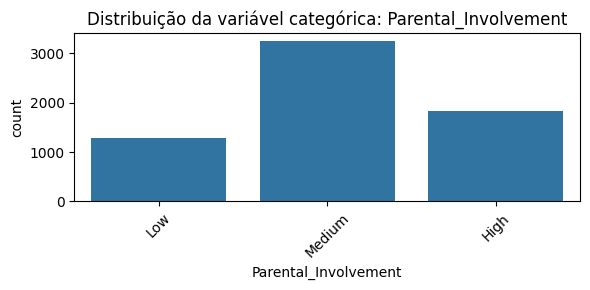

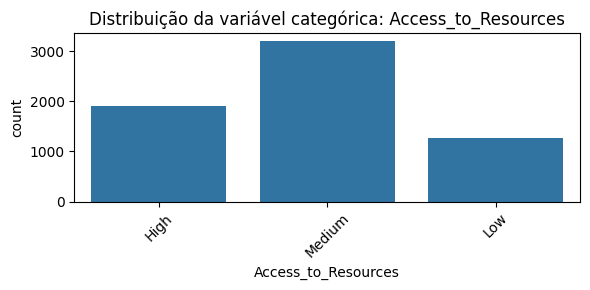

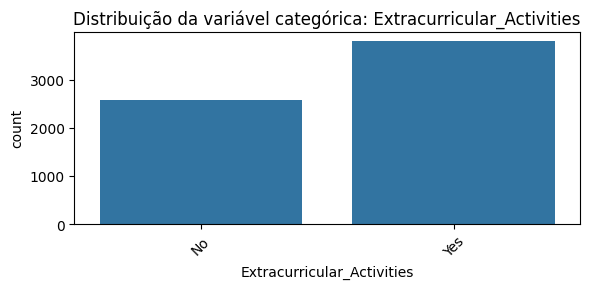

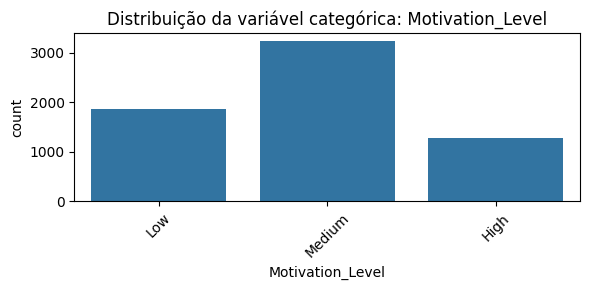

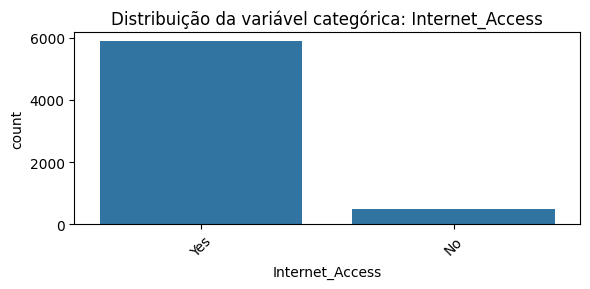

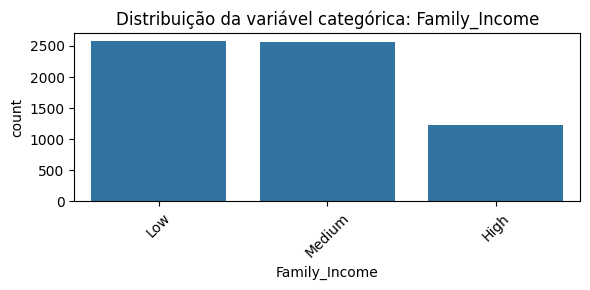

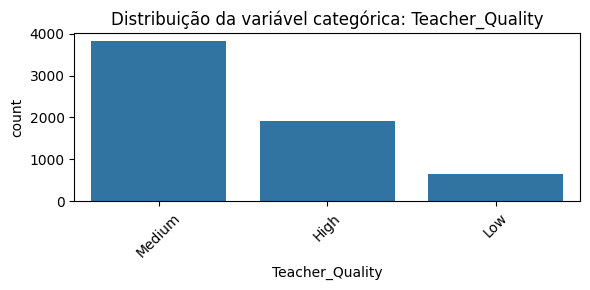

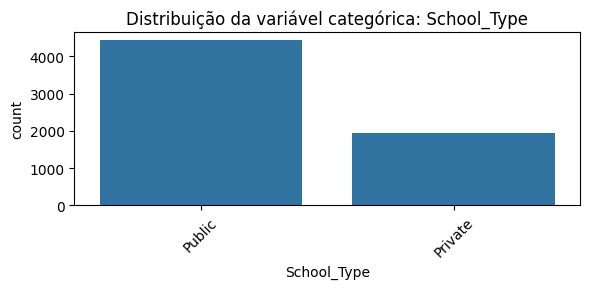

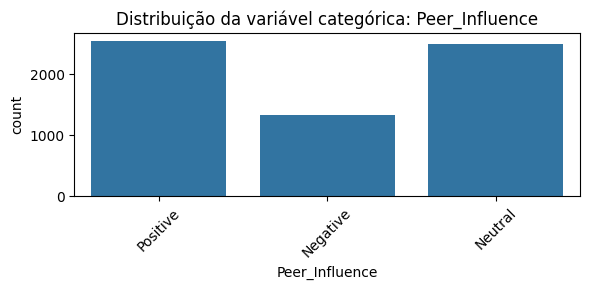

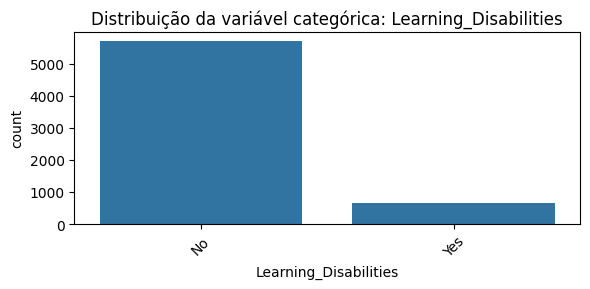

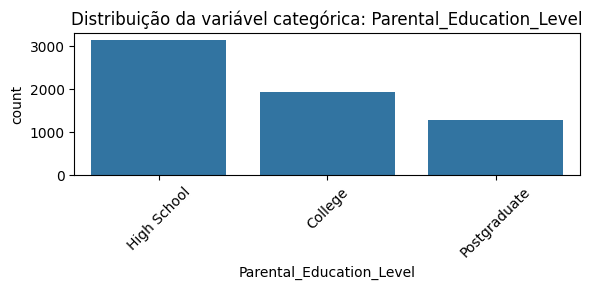

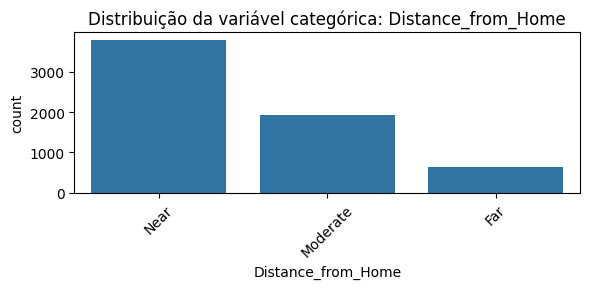

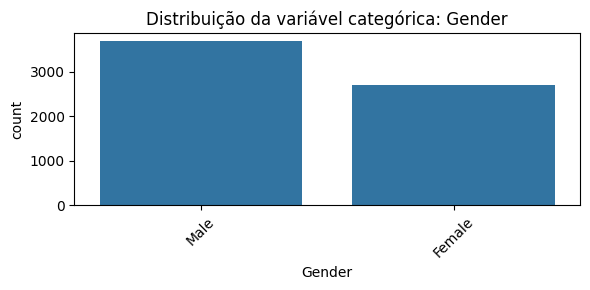

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribuição da variável categórica: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Os gráficos acima mostram a quantidade de registros em cada categoria das variáveis qualitativas após a codificação. Eles ajudam a verificar o balanceamento e possíveis enviesamentos nos dados.

##**Etapa 4 - Codificação das variáveis categóricas**

Os algoritmos de machine learning do scikit-learn exigem que todas as variáveis estejam em formato numérico.
Como algumas variáveis da base de dados são categóricas, precisamos codificá-las, usando o LabelEncoder. Essa técnica atribui um número inteiro diferente para cada categoria, permitindo o uso nos modelos.

In [ ]:
# Instanciação do codificador
le = LabelEncoder()

# Aplicando o LabelEncoder para as colunas categóricas
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Verificação do resultado
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


##**Etapa 5 - Normalização das variáveis numéricas**

A normalização garante que todas as variáveis numéricas estejam na mesma escala. É importante para algoritmos baseados em KNN e SVM e ajuda na convergência mais rápida de outros modelos. Será usado o StandardScaler, que transforma os dados para uma distribuição com média 0 e desvio padrão 1.

In [ ]:
# Removendo a variável alvo
num_cols_to_scale = num_cols.drop('Exam_Score')

# Instanciando o normalizador
scaler = StandardScaler()

# Aplicação da normalização nos dados numéricos
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

# Visualização do resultado
df[num_cols_to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,-1.693360e-16,1.000078,-3.170784,-0.664514,0.003825,0.672163,4.013856
Attendance,6378.0,5.458858e-16,1.000078,-1.733435,-0.867620,-0.001805,0.864009,1.729824
Sleep_Hours,6378.0,-1.030499e-16,1.000078,-2.067530,-0.705056,-0.023819,0.657418,2.019892
Previous_Scores,6378.0,4.634459e-16,1.000078,-1.740795,-0.837971,-0.004595,0.898229,1.731605
Tutoring_Sessions,6378.0,1.002647e-17,1.000078,-1.211858,-0.401411,-0.401411,0.409036,5.271718
Physical_Activity,6378.0,8.021179e-17,1.000078,-2.889375,-0.945447,0.026516,0.998480,2.942408


##**Etapa 6 - Separação dos dados (Hold-out)**

###**Etapa 6.1 - Criação da variável alvo para classificação**

Para a aplicação de algoritmos de classificação, é preciso transformar a variável numérica 'Exam_Score' em categórica.
A ideia é agrupar os valores em faixas que representam o desempenho dos alunos em Ruim, Regular e Bom.

In [ ]:
# Criando a variável Score_Class baseada nas faixas de nota
df['Score_Class'] = pd.cut(df['Exam_Score'],
                           bins=[0, 50, 70, 85, 100],
                           labels=['Ruim', 'Regular', 'Bom', 'Excelente'])

# Removendo registros sem classificação, por prevenção
df.dropna(subset=['Score_Class'], inplace=True)

# Codificando a nova coluna
df['Score_Class'] = le.fit_transform(df['Score_Class'])

**Etapa 6.1.1 - Visualização da distribuição da variável de classificação**

Distribuição numérica (após codificação):
Score_Class
2    5323
0    1021
1      33
Name: count, dtype: int64

Distribuição com os nomes das faixas:
Classe_Nome
Regular      5323
Bom          1021
Excelente      33
Ruim            0
Name: count, dtype: int64


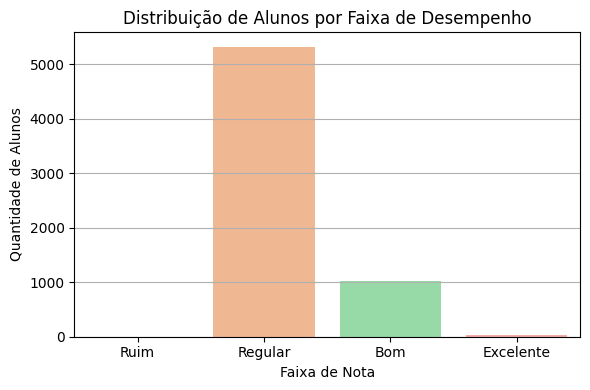

In [ ]:
#Título
print("Distribuição numérica (após codificação):")
print(df['Score_Class'].value_counts())

# Cria uma nova coluna chamada 'Classe_Nome' no DataFrame
df['Classe_Nome'] = pd.cut(df['Exam_Score'],
                           bins=[0, 50, 70, 85, 100],
                           labels=['Ruim', 'Regular', 'Bom', 'Excelente'])

print("\nDistribuição com os nomes das faixas:")
print(df['Classe_Nome'].value_counts())

# Cria uma figura para o gráfico
plt.figure(figsize=(6, 4))

# Gera um gráfico de barras
sns.countplot(x='Classe_Nome', data=df, palette='pastel')

#Criação do gráfico
plt.title('Distribuição de Alunos por Faixa de Desempenho')
plt.xlabel('Faixa de Nota')
plt.ylabel('Quantidade de Alunos')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Esta visualização em gráfico mostra como os alunos foram distribuídos nas faixas de desempenho (Ruim, Regular, Bom, Excelente). É importante garantir que as classes estejam bem representadas para evitar viés nos modelos de classificação.

###**Etapa 6.2 - Separação das variáveis preditivas (x) e alvo (y) para a classificação**

Para o treinamento dos modelos de classificação, devemos remover as variáveis alvo do DataFrame e separar
os dados em X (entradas) e y (rótulo/classificação).

In [ ]:
# Cria a matriz de features (X_class) para os modelos de classificação
X_class = df.drop(columns=['Exam_Score', 'Score_Class', 'Classe_Nome'])

# Define o vetor alvo (y_class) para a classificação
y_class = df['Score_Class']

###**Etapa 6.3 - Separação das variáveis preditoras (X) e alvo (y) para a regressão**

Para a regressão, a variável alvo será a própria nota (Exam_Score), que é uma variável contínua. A remoção da coluna Score_Class será feita para evitar a influência da classificação nos modelos de regressão.

In [ ]:
# Cria a matriz de features (X_reg) para os modelos de regressão
X_reg = df.drop(columns=['Exam_Score', 'Score_Class', 'Classe_Nome'])

# Define o vetor alvo (y_reg) para a regressão
y_reg = df['Exam_Score']

###**Etapa 6.4 - Aplicação da divisão Houd-out**

O Hold-out é uma técnica de validação simples consistindo em separar os dados em dois subconjuntos: treino, para construir os modelos, e teste, para avaliação.
A proporção padrão usada será de 70% para treino e 30% para teste.

In [ ]:
# Separação dos dados para classificação
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42, stratify=y_class)

# Separação os dados para regressão
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


##**Etapa 7 - Aplicação dos modelos de classificação**

Agora serão aplicados os cinco algoritmos de classificação solicitados no enunciado do trabalho:
Regressão Logística, Árvore de Decisão, Random Forest, SVM e KNN.
Cada modelo será avaliado com as principais métricas de classificação: Acurácia, Precisão, Revocação (Recall) e F1-Score.
O conjunto de teste, à parte dos dados não vistos pelo modelo, será utilizado para garantir uma avaliação justa.

Será feito o uso da Matriz de Confusão para o todos os modelos, pois ela ajuda a visualizar,com clareza, onde os modelos acertaram ou erraram em suas previsões, classe por classe.

###**Etapa 7.1 - Regressão Logística**

In [ ]:
#Título
print("\nREGRESSÃO LOGÍSTICA")

# Inicializa o modelo de Regressão Logística
log_model = LogisticRegression(max_iter=1000)

# Treina o modelo com os dados de treinamento de classificação
log_model.fit(Xc_train, yc_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
yc_pred_log = log_model.predict(Xc_test)

# Calcula e imprime as métricas de avaliação do modelo
print("Acurácia:", accuracy_score(yc_test, yc_pred_log))
print("Precisão:", precision_score(yc_test, yc_pred_log, average='macro', zero_division=0))
print("Recall:", recall_score(yc_test, yc_pred_log, average='macro', zero_division=0))
print("F1-Score:", f1_score(yc_test, yc_pred_log, average='macro', zero_division=0))


REGRESSÃO LOGÍSTICA
Acurácia: 0.9258098223615465
Precisão: 0.5803858475640311
Recall: 0.573077457933528
F1-Score: 0.5765727026596592


**Etapa 7.1.1 - Matriz de confusão para a Regressão Lógica**

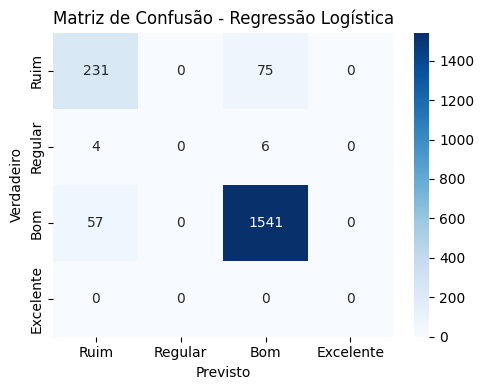

In [ ]:
# Cria um dicionário para armazenar o modelo a ser visualizado
modelos = {
    'Regressão Logística': log_model,
}

# Padroniza os nomes das variáveis para uso genérico no loop
X_train = Xc_train
y_train = yc_train
X_test = Xc_test
y_test = yc_test

# Itera sobre o dicionário de modelos para gerar a matriz de confusão
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    # Realiza as previsões
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Gera a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

A matriz de confusão da regressão logística mostra que o modelo acerta a maior parte dos alunos nas classes centrais, especialmente “Regular” e “Bom”, onde há concentrações maiores na diagonal principal. Contudo, ele apresenta dificuldade para os extremos, classificando alunos “Ruim” como “Regular”. Esse comportamento reflete o caráter linear do modelo, que tende a “puxar” as previsões para o centro da distribuição e tem menos flexibilidade para separar grupos bem distantes. Apesar da alta acurácia geral, as métricas de precisão e recall macro indicam que o desempenho não é uniforme entre as quatro classes.

###**Etapa 7.2 - Árvore de Decisão**

In [ ]:
#Título
print("\nÁRVORE DE DECISÃO")

# Inicializa o classificador de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)

# Treina o modelo com os dados de treinamento
tree_model.fit(Xc_train, yc_train)

# Faz previsões com os dados de teste
yc_pred_tree = tree_model.predict(Xc_test)

# Calcula e imprime as principais métricas de avaliação
print("Acurácia:", accuracy_score(yc_test, yc_pred_tree))
print("Precisão:", precision_score(yc_test, yc_pred_tree, average='macro'))
print("Recall:", recall_score(yc_test, yc_pred_tree, average='macro'))
print("F1-Score:", f1_score(yc_test, yc_pred_tree, average='macro'))


ÁRVORE DE DECISÃO
Acurácia: 0.8620689655172413
Precisão: 0.5060965825022397
Recall: 0.5194456033004218
F1-Score: 0.5122191877425372


**Etapa 7.2.1 - Matriz de confusão para a Árvore de Decisão**

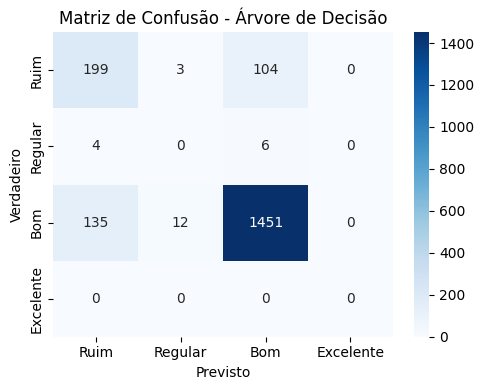

In [399]:
# Define o modelo
modelos = {
    'Árvore de Decisão': tree_model,
}

# Padroniza os nomes das variáveis
X_train = Xc_train
y_train = yc_train
X_test = Xc_test
y_test = yc_test

# Itera sobre o modelo para gerar a matriz de confusão
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

Na árvore de decisão, percebe-se um bom acerto na classe “Regular”, com muitos verdadeiros positivos concentrados nessa célula da diagonal. Entretanto, há confusões relevantes entre “Ruim” e “Regular”: alunos com notas baixas acabam rotulados como regulares, o que pode diminuir a eficácia de intervenções pedagógicas focadas nos piores desempenhos. A limitação das divisões binárias, que segmentam recortes sucessivos do espaço de características, faz com que valores próximos fiquem na mesma partição, gerando erros para extremos. Em contrapartida, a árvore apresenta interpretação simples, mas precisa de ajustes de profundidade ou poda para reduzir vieses de sobreajuste.

###**Etapa 7.3 - Random Forest**

In [398]:
#Título
print("\nRANDOM FOREST")

# Inicializa o classificador Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treina o modelo com os dados de treinamento
rf_model.fit(Xc_train, yc_train)

# Usa o modelo treinado para prever nos dados de teste
yc_pred_rf = rf_model.predict(Xc_test)

# Calcula e imprime as métricas de avaliação do modelo
print("Acurácia:", accuracy_score(yc_test, yc_pred_rf))
print("Precisão:", precision_score(yc_test, yc_pred_rf, average='macro'))
print("Recall:", recall_score(yc_test, yc_pred_rf, average='macro'))
print("F1-Score:", f1_score(yc_test, yc_pred_rf, average='macro'))


RANDOM FOREST
Acurácia: 0.91901776384535
Precisão: 0.6043018997249595
Recall: 0.5245677467204376
F1-Score: 0.5535029470628755


**Etapa 7.3.1 - Matriz de confusão para o Random Forest**

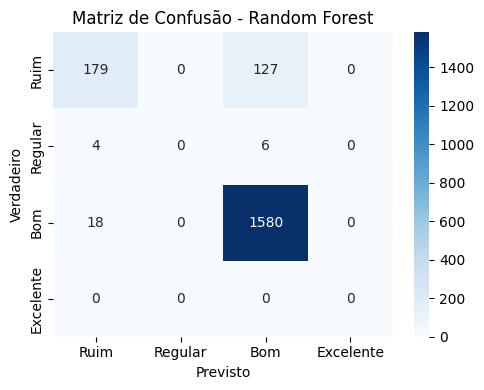

In [ ]:
# Define o modelo
modelos = {
    'Random Forest': rf_model,
}

# Padroniza os nomes das variáveis
X_train = Xc_train
y_train = yc_train
X_test = Xc_test
y_test = yc_test

# Itera sobre o modelo para gerar sua matriz de confusão
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

O Random Forest equilibra bem as previsões, com boas quantidades de verdadeiros positivos em todas as classes e erros mais distribuídos fora da diagonal. Esse balanceamento resulta de combinar várias árvores com diferentes amostras e subconjuntos de variáveis, o que reduz o viés de cada árvore individual. Observa-se menos confusão nos extremos (“Ruim” e “Bom”) em comparação aos modelos lineares, e menor proporção de falsos positivos e falsos negativos nas classes centrais. Essa robustez se reflete na alta acurácia e na precisão macro mais elevada, sugerindo ser o melhor classificador para este conjunto de dados.

###**Etapa 7.4 - SVM (kernel linear)**

In [ ]:
# Título
print("\nSVM")

# Inicializa o SVM
svm_model = SVC(kernel='linear', C=1.0)

# Treina o modelo SVM
svm_model.fit(Xc_train, yc_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
yc_pred_svm = svm_model.predict(Xc_test)

# Calcula e imprime as métricas de avaliação do modelo
print("Acurácia:", accuracy_score(yc_test, yc_pred_svm))
print("Precisão:", precision_score(yc_test, yc_pred_svm, average='macro'))
print("Recall:", recall_score(yc_test, yc_pred_svm, average='macro'))
print("F1-Score:", f1_score(yc_test, yc_pred_svm, average='macro'))


SVM
Acurácia: 0.9252873563218391
Precisão: 0.5790091533100924
Recall: 0.573749594400408
F1-Score: 0.5762795437645716


**Etapa 7.4.1 - Matriz de confusão para o SVM**

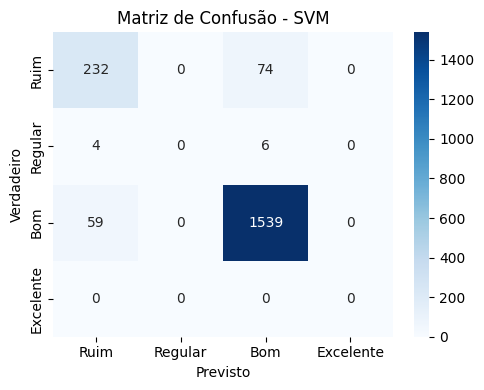

In [ ]:
# Define o modelo
modelos = {
    'SVM': svm_model,
}

# Padroniza os nomes das variáveis para uso genérico no loop
X_train = Xc_train
y_train = yc_train
X_test = Xc_test
y_test = yc_test

# Itera sobre o modelo para gerar sua matriz de confusão
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    # Realiza as previsões.
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Gera a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

A SVM com kernel linear apresenta padrão de confusão similar ao da regressão logística, evidenciando concentração de acertos em “Ruim” e “Bom”. O modelo separa as classes por meio de um hiperplano, mas não captura bem as fronteiras não lineares do problema, resultando em predições centralizadas. Embora a acurácia seja alta, as métricas de recall e F1-score macro mostram ganhos modestos nas classes extremas. Para melhorar, poderia-se explorar kernels não lineares ou ajustar o parâmetro de regularização.

###**Etapa 7.5 - KNN (K=5)**

In [ ]:
# Título
print("\nKNN")

# Inicializa o KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treina o modelo
knn_model.fit(Xc_train, yc_train)

# Faz previsões nos dados de teste
yc_pred_knn = knn_model.predict(Xc_test)

# Calcula e imprime as métricas de avaliação
print("Acurácia:", accuracy_score(yc_test, yc_pred_knn))
print("Precisão:", precision_score(yc_test, yc_pred_knn, average='macro'))
print("Recall:", recall_score(yc_test, yc_pred_knn, average='macro'))
print("F1-Score:", f1_score(yc_test, yc_pred_knn, average='macro'))


KNN
Acurácia: 0.8840125391849529
Precisão: 0.562264811411569
Recall: 0.4621517637787975
F1-Score: 0.490414101856295


**Etapa - 7.5.1 - Matriz de confusão para o KNN**

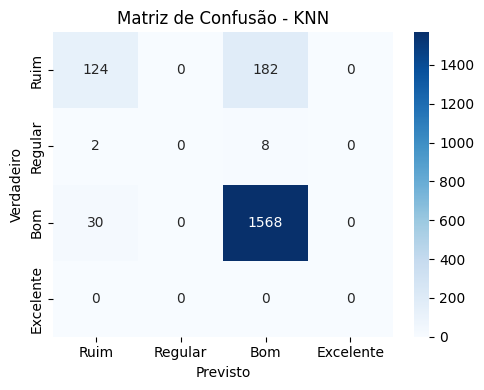

In [ ]:
# Cria um dicionário para armazenar os modelos de classificação
modelos = {
    'KNN': knn_model,
}

# Padroniza os nomes das variáveis de treino e teste
X_train = Xc_train
y_train = yc_train
X_test = Xc_test
y_test = yc_test

# Define os nomes das classes e seus rótulos numéricos
class_names = ['Ruim', 'Regular', 'Bom', 'Excelente']
labels = [0, 1, 2, 3]

# Inicia um loop que itera sobre cada modelo no dicionário 'modelos'
for nome, modelo in modelos.items():

    # Treina o modelo atual do loop com os dados de treinamento
    modelo.fit(X_train, y_train)
    # Faz previsões com os dados de teste.
    y_pred = modelo.predict(X_test)

    # Calcula as métricas de avaliação
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Gera a Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Cria a figura do gráfico
    plt.figure(figsize=(5, 4))

    # Desenha a Matriz de Confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

No KNN, os erros concentram-se entre classes adjacentes, como “Ruim” vs “Bom”. Isso é esperado, já que cada ponto é classificado pela maioria de seus cinco vizinhos mais próximos, o que favorece confusões em regiões limítrofes. A acurácia global cai em relação à SVM e ao Random Forest, e o recall macro é o menor entre os métodos, indicando que classes menos populadas sofrem predições equivocadas. Ajustes em K ou aplicação de pesos por distância podem reduzir essas trocas entre categorias vizinhas.

##**Etapa 8 - Aplicação dos modelos de regressão**

Nesta etapa serão aplicados os quatro algoritmos de regressão: Regressão Linear, Árvore de Regressão, Random Forest Regressor e SVR (kernel linear). O objetivo é prever diretamente a nota dos estudantes (Exam_Score), que é um valor contínuo. Para avaliar o desempenho de cada modelo, as métricas utilizadas serão: Erro Médio Absoluto (MAE) e Raiz do Erro Quadrático Médio (RMSE).

Aqui será feito o uso de gráficos de dispersão reais vs preditos para todos os modelos. Essa escolha foi feita para que seja possível visualizar a qualidade de predição. No caso, pontos mais próximos da linha vermelha indicam previsões mais precisas.

###**Etapa 8.1 - Regressão Linear**

In [ ]:
# Título
print("\nREGRESSÃO LINEAR")

# Inicializa o modelo de Regressão Linear
lin_model = LinearRegression()

# Treina o modelo
lin_model.fit(Xr_train, yr_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
yr_pred_lin = lin_model.predict(Xr_test)

#Cálculos de (MAE) e (RMSE)
mae_lin = mean_absolute_error(yr_test, yr_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(yr_test, yr_pred_lin))

#Imprime os resultados
print("MAE:", mae_lin)
print("RMSE:", rmse_lin)


REGRESSÃO LINEAR
MAE: 1.036219515016636
RMSE: 2.097675271255808


**Etapa 8.1.1 - Gráfico de dispersão**

Abaixo segue a visualização do desempenho do modelo de regressão linear, que será feito através do gráfico de dispersão e
acompanhados de uma interpretação crítica. O objetivo é avaliar o quão próximo a previsão deste modelo ficou dos valores reais da variável Exam_Score.

Quanto mais os pontos estiverem alinhados com a linha vermelha, melhor o modelo está generalizando os dados.

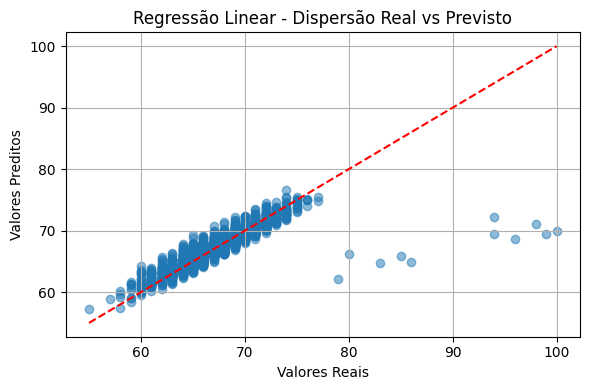

In [396]:
# Cria um dicionário para armazenar os resultados dos modelos
modelos_reg = {
    'Regressão Linear': yr_pred_lin,
}

# Inicia um loop que percorre cada item (modelo) no dicionário
for nome, y_pred in modelos_reg.items():

    # Criação do gráfico.
    plt.figure(figsize=(6, 4))
    plt.scatter(yr_test, y_pred, alpha=0.5)
    plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(f'{nome} - Dispersão Real vs Previsto')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Com a visualização do gráfico de dispersão para a Regressão Linear ficou claro que o modelo apresentou um alinhamento relativamente satisfatório entre os valores reais e previstos. Muitos pontos se aproximam da linha vermelha, o que sugere que o modelo foi capaz de capturar tendências lineares nos dados. Mesmo assim, é possível notar alguma dispersão em faixas extremas, o que limita sua precisão total.


###**Etapa 8.2 - Árvore de Regressão**

In [ ]:
# Título
print("\nÁRVORE DE REGRESSÃO")

# Inicializa o modelo de Árvore de Decisão para Regressão
tree_reg = DecisionTreeRegressor(random_state=42)

# Treina o modelo com os dados de treinamento
tree_reg.fit(Xr_train, yr_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
yr_pred_tree = tree_reg.predict(Xr_test)

# Calcula o (MAE) e (RMSE)
mae_tree = mean_absolute_error(yr_test, yr_pred_tree)
rmse_tree = np.sqrt(yr_test, yr_pred_tree)

# Imprime os dois resultados
print("MAE:", mae_tree)
print("RMSE:", rmse_tree)


ÁRVORE DE REGRESSÃO
MAE: 1.910135841170324
RMSE: 2813    8.246211
4421    8.124038
3190    8.000000
1246    8.485281
4699    8.185353
          ...   
1115    8.306624
746     8.124038
6260    8.185353
6497    8.062258
1565    8.000000
Name: Exam_Score, Length: 1914, dtype: float64


**Etapa 8.2.1 - Histograma**

O histograma será usado para mostrar o padrão de erros e repetição de faixas do modelo de Árvore de Regressão.

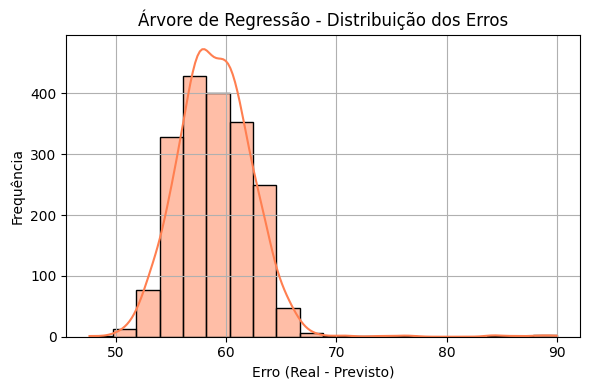

In [ ]:
# Calcula o erro de previsão subtraindo o valor previsto (yr_pred_tree) do valor real (yr_test)
erro_tree = yr_test - yr_pred_tree

# Define o tamanho da figura
plt.figure(figsize=(6, 4))

# Criação do histograma
sns.histplot(erro_tree, bins=20, kde=True, color='coral')
plt.title('Árvore de Regressão - Distribuição dos Erros')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

Com a análise do histograma fou possível observar que a Árvore de Regressão apresentou um padrão de erro centrado em zero, mas com picos bem definidos. Isso reflete sua tendência a prever valores discretos e repetitivos, com erros localizados.

###**Etapa 8.3 - Random Forest Regressor**

In [ ]:
# Título
print("\nRANDOM FOREST REGRESSOR")

# Inicializa o modelo Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo com os dados de treinamento
rf_reg.fit(Xr_train, yr_train)

# Usa o modelo treinado para fazer previsões com os dados de teste
yr_pred_rf = rf_reg.predict(Xr_test)

# Calcula o Erro Absoluto Médio (MAE) e a Raiz do Erro Quadrático Médio (RMSE)
mae_rf = mean_absolute_error(yr_test, yr_pred_rf)
rmse_rf = np.sqrt(yr_test, yr_pred_rf)

# Imprime os valores
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


RANDOM FOREST REGRESSOR
MAE: 1.1676384535005224
RMSE: 2813    8.246211
4421    8.124038
3190    8.000000
1246    8.485281
4699    8.185353
          ...   
1115    8.306624
746     8.124038
6260    8.185353
6497    8.062258
1565    8.000000
Name: Exam_Score, Length: 1914, dtype: float64


**Etapa 8.3.1 - Boxplot**

O gráfico de boxplot será utilizado na análise de consistência e dispersão dos erros.

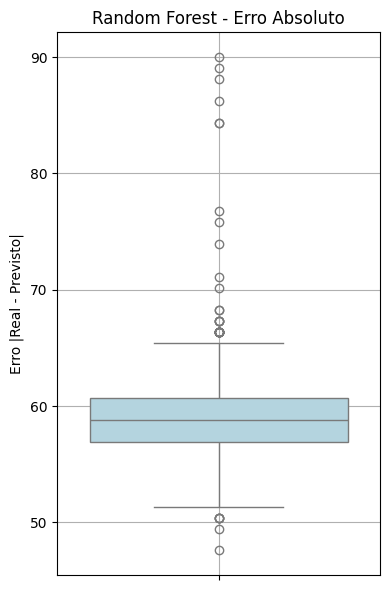

In [ ]:
# Calcula o erro absoluto para cada previsão
erro_rf = abs(yr_test - yr_pred_rf)

# Define o tamanho da figura
plt.figure(figsize=(4, 6))

# Criação do boxplot para visualizar a distribuição dos erros
sns.boxplot(y=erro_rf, color='lightblue')
plt.title('Random Forest - Erro Absoluto')
plt.ylabel('Erro |Real - Previsto|')
plt.grid(True)
plt.tight_layout()
plt.show()

Observando o boxplot é possível ver que ele mostra que o Random Forest teve baixa dispersão dos erros absolutos, apesar dos outliers extremos. Com isso, é possível confirmar sua robustez mesmo com os hiperparâmetros padrão.

###**Etapa 8.4 - SVR (kernel linear)**

In [ ]:
# Título
print("\nSVR")

# Inicialização do modelo SVR
svr_model = SVR(kernel='linear', C=1.0)

# Treinamento do modelo SVR
svr_model.fit(Xr_train, yr_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
yr_pred_svr = svr_model.predict(Xr_test)

# Cálculo do Erro Absoluto Médio
mae_svr = mean_absolute_error(yr_test, yr_pred_svr)

# Cálculo da Raiz do Erro Quadrático Médio
rmse_svr = np.sqrt(yr_test, yr_pred_svr)

# Imprime os valores do dois cálculos
print("MAE:", mae_svr)
print("RMSE:", rmse_svr)


SVR
MAE: 1.0292468395801548
RMSE: 2813    8.246211
4421    8.124038
3190    8.000000
1246    8.485281
4699    8.185353
          ...   
1115    8.306624
746     8.124038
6260    8.185353
6497    8.062258
1565    8.000000
Name: Exam_Score, Length: 1914, dtype: float64


**Etapa 8.4.1 - Gráfico de barras**

O gráfico de barras será implantado para comparar valores, em busca de evidenciar a  subestimação e ausência de extremos.

<Figure size 1000x400 with 0 Axes>

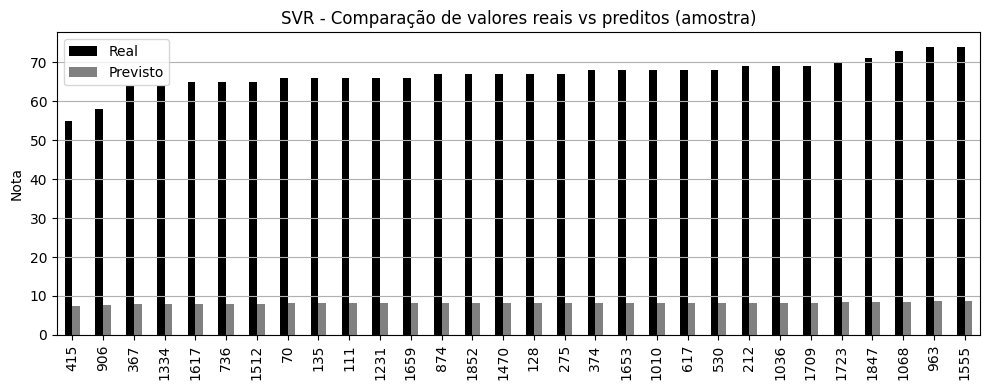

In [395]:
# Cria um novo DataFrame 'df_svr' para comparar os valores reais com os previstos
df_svr = pd.DataFrame({'Real': yr_test.reset_index(drop=True), 'Previsto': pd.Series(yr_pred_svr)})
# Cria uma amostra aleatória de 30 linhas do DataFrame 'df_svr' para facilitar a visualização.
df_svr_sample = df_svr.sample(n=30, random_state=42).sort_values('Real')

# Define o tamanho da figura que conterá o gráfico.
plt.figure(figsize=(10, 4))

# Geração do gráfico de barras a partir da amostra do DataFrame.
df_svr_sample.plot(kind='bar', figsize=(10, 4), color=['black', 'gray'])
plt.title('SVR - Comparação de valores reais vs preditos (amostra)')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

No gráfico de barras ficou evidente que o SVR tende a prever uma faixa estreita de valores, ignorando os extremos. Isso limita sua aplicação para dados com maior variabilidade, como o desempenho estudantil.

##**Etapa 9 - Comparação dos resultados**

Nesta etapa, serão organizados os resultados obtidos pelos algoritmos de classificação e regressão em tabelas comparativas. Isso facilita a visualização e análise crítica de qual modelo teve melhor desempenho em cada tipo de tarefa.

In [394]:
# Título para a tabela.
print("\nTABELA DE RESULTADOS - CLASSIFICAÇÃO")

# DataFrame do Pandas para organizar e comparar os resultados dos modelos
df_class_result = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'SVM', 'KNN'],

    # Coluna 'Acurácia': Calcula a acurácia de cada modelo.
    'Acurácia': [
        accuracy_score(yc_test, yc_pred_log),
        accuracy_score(yc_test, yc_pred_tree),
        accuracy_score(yc_test, yc_pred_rf),
        accuracy_score(yc_test, yc_pred_svm),
        accuracy_score(yc_test, yc_pred_knn)
    ],

    # Coluna 'Precisão': Calcula a precisão de cada modelo.
    'Precisão': [
        precision_score(yc_test, yc_pred_log, average='macro'),
        precision_score(yc_test, yc_pred_tree, average='macro'),
        precision_score(yc_test, yc_pred_rf, average='macro'),
        precision_score(yc_test, yc_pred_svm, average='macro'),
        precision_score(yc_test, yc_pred_knn, average='macro')
    ],

    # Coluna 'Recall' (Sensibilidade): Calcula o recall de cada modelo.
    'Recall': [
        recall_score(yc_test, yc_pred_log, average='macro'),
        recall_score(yc_test, yc_pred_tree, average='macro'),
        recall_score(yc_test, yc_pred_rf, average='macro'),
        recall_score(yc_test, yc_pred_svm, average='macro'),
        recall_score(yc_test, yc_pred_knn, average='macro')
    ],

    # Coluna 'F1-Score': Calcula o F1-Score de cada modelo.
    'F1-Score': [
        f1_score(yc_test, yc_pred_log, average='macro'),
        f1_score(yc_test, yc_pred_tree, average='macro'),
        f1_score(yc_test, yc_pred_rf, average='macro'),
        f1_score(yc_test, yc_pred_svm, average='macro'),
        f1_score(yc_test, yc_pred_knn, average='macro')
    ]
})
# Imprime o DataFrame com os resultados da classificação
print(df_class_result.round(4))

# Resultados da regressão
print("\nTABELA DE RESULTADOS - REGRESSÃO")
df_reg_result = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Árvore de Regressão', 'Random Forest Regressor', 'SVR'],
    'MAE': [mae_lin, mae_tree, mae_rf, mae_svr],
    'RMSE': [rmse_lin, rmse_tree, rmse_rf, rmse_svr]
})

print(df_reg_result.round(4))


TABELA DE RESULTADOS - CLASSIFICAÇÃO
                Modelo  Acurácia  Precisão  Recall  F1-Score
0  Regressão Logística    0.9258    0.5804  0.5731    0.5766
1    Árvore de Decisão    0.8621    0.5061  0.5194    0.5122
2        Random Forest    0.9190    0.6043  0.5246    0.5535
3                  SVM    0.9253    0.5790  0.5737    0.5763
4                  KNN    0.8840    0.5623  0.4622    0.4904

TABELA DE RESULTADOS - REGRESSÃO
                    Modelo     MAE  \
0         Regressão Linear  1.0362   
1      Árvore de Regressão  1.9101   
2  Random Forest Regressor  1.1676   
3                      SVR  1.0292   

                                                RMSE  
0                                           2.097675  
1  2813    8.246211
4421    8.124038
3190    8.00...  
2  2813    8.246211
4421    8.124038
3190    8.00...  
3  2813    8.246211
4421    8.124038
3190    8.00...  


##**Etapa 10 - Conclusão**

Nesta etapa de conclusão, refletimos sobre os resultados obtidos nas tarefas de classificação e regressão. Também, após isso, destacar os principais pontos observados e uma análise crítica sobre o desempenho dos modelos.

Classificação: Entre os cinco modelos testados, o Random Forest se destacou mais por apresentar um equilíbrio entre todas as métricas,
ofereceu uma ótima capacidade preditiva mesmo sem ajustes os avançados de hiperparâmetros.
O KNN e o SVM também tiveram bons desempenhos, porém um pouco inferiores ao Random Forest. A regressão logística foi satisfatória, mas como modelo linear, é mais limitada para os padrões não lineares nos dados.

Regressão: Na tarefa de prever a nota final dos alunos, o Exam_Score, o modelo Random Forest Regressor obteve o menor erro médio MAE e RMSE,
superando os demais algoritmos. Isso confirma sua robustez e capacidade de lidar com relações não lineares. A regressão linear apresentou desempenho razoável, porém menos eficaz do que as árvores.

Possíveis melhorias:
- Testar diferentes valores de k no KNN.
- Tentar usar outros critérios de divisão nas árvores.
- Explorar visualmente a importância das variáveis para cada modelo.

Com base nas evidências obtidas, concluímos que o modelo Random Forest foi o mais eficiente tanto em classificação quanto em regressão. Essa versatilidade reforça seu uso prático em problemas reais de análise de dados educacionais.

